<a href="https://colab.research.google.com/github/0anower/BDA_Project1/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All the necessary libraries

In [15]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import random
import cv2
import os

Importing dataset from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


dataset in google drive is a zip folder. Here, the folder is unzipped and loaded into collab.

In [3]:
import os
import zipfile

zip_file = '/content/drive/MyDrive/TomatoPlantVillage.zip'  # Replace with your zip file name
extracted_file = '/content/PlantVillage'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extracted_file)

Lists all the sub folders.
Each sub-folder is a class.

In [4]:
os.listdir(extracted_file)
work_folder = '/content/PlantVillage/TomatoPlantVillage'
os.listdir(work_folder)

diseases = [d for d in os.listdir(work_folder) if os.path.isdir(os.path.join(work_folder, d))]

shows how many images each class contain, in a tabular form.

In [5]:
nums = {}
for class_dir in os.listdir(work_folder):
    dir_path = os.path.join(work_folder, class_dir)
    if os.path.isdir(dir_path):  # Check if it is a directory
        nums[class_dir] = len(os.listdir(dir_path))  # Count files in the directory

panda_classes = pd.DataFrame(list(nums.items()), columns=['Class', 'Number of Images'])
panda_classes

,Class,Number of Images
0,Tomato__Tomato_YellowLeaf__Curl_Virus,3209
1,Tomato_Leaf_Mold,952
2,Tomato_Early_blight,1000
3,Tomato_healthy,1591
4,Tomato_Septoria_leaf_spot,1771
5,Tomato__Target_Spot,1404
6,Tomato_Bacterial_spot,2127
7,Tomato__Tomato_mosaic_virus,373
8,Tomato_Late_blight,1909
9,Tomato_Spider_mites_Two_spotted_spider_mite,1676


Visualizes the previous table as a histogram.

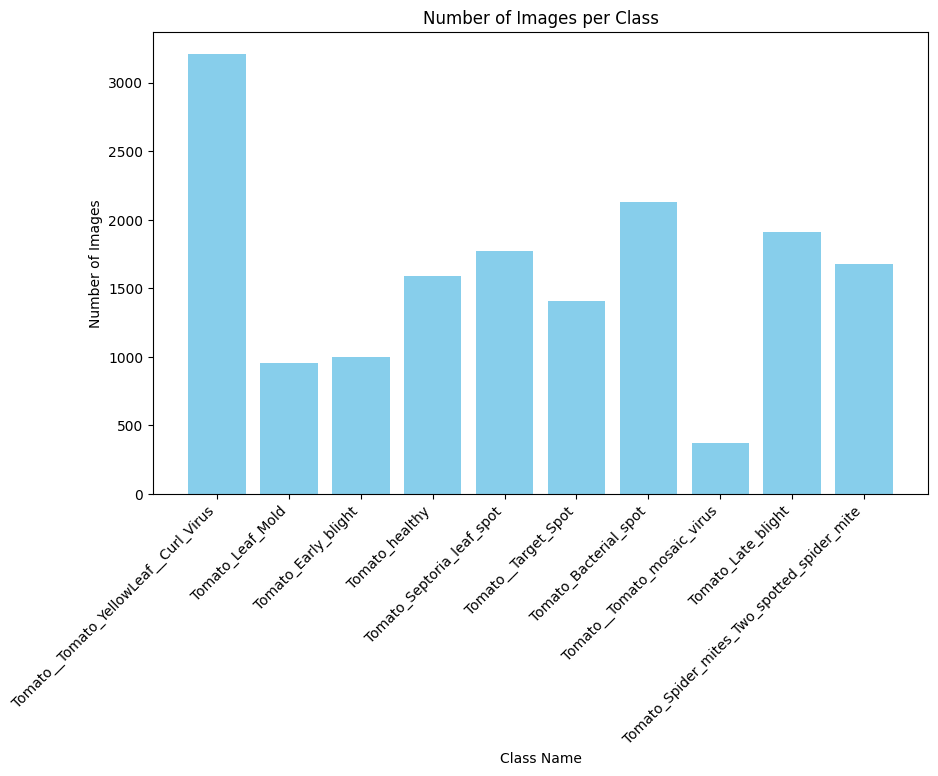

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(panda_classes["Class"], panda_classes["Number of Images"], color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.show()

Creates designated folders for splitted data

In [12]:
os.listdir(work_folder)

['Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Leaf_Mold',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato_Bacterial_spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Late_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite']

creates training, validation, and test sets directories

In [14]:
#destinations
split_dataset = "TomatoPlantDataset/"

train_path = os.path.join(split_dataset, "training_data")
val_path = os.path.join(split_dataset, "validation_data")
test_path = os.path.join(split_dataset, "testing_data")

#image_exe = ['.jpg']

# makes seperate dirs
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [11]:
# def load_images(work_folder, image_size=(64,64)):
#     images = []
#     labels = []
#     random.shuffle(work_folder)

#     for images, labels in work_folder:
#       images.append(images)
#       labels.append(labels)

#     return images, labels

In [16]:
train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

# Define a function to split data
def datasplit(work_folder, train_path, val_path, test_path, val_ratio=0.15, test_ratio=0.15):
    # Get class names
    class_names = os.listdir(work_folder)

    for cls in class_names:
        class_dir = os.path.join(work_folder, cls)
        images = os.listdir(class_dir)

        # Split the dataset
        train_and_val, testing_data = train_test_split(images, test_size=test_ratio, random_state=42)
        training_data, validation_data = train_test_split(train_and_val, test_size=val_ratio, random_state=42)

        # Copy the images to the respective directories
        for img in training_data:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_path, cls))
        for img in validation_data:
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_path, cls))
        for img in testing_data:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_path, cls))

# Create subdirectories for each class in train, val, test directories
for cls in os.listdir(work_folder):
    os.makedirs(os.path.join(train_path, cls), exist_ok=True)
    os.makedirs(os.path.join(val_path, cls), exist_ok=True)
    os.makedirs(os.path.join(test_path, cls), exist_ok=True)

# Split the data
datasplit(work_folder, train_path, val_path, test_path)
